# PBMC3k: 30% Cells: 1635 Features: 4121

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocess

In [6]:
import os
path = 'C:/Users/jzhou417/Desktop/pbmc3k/'
if os.path.exists(path):
    files = os.listdir(path)
files

['.ipynb_checkpoints',
 '.Rhistory',
 '1',
 '10',
 '30',
 '50',
 '60',
 '70',
 '90',
 '90new',
 'barcodes.tsv',
 'Comparison-sc10x-3c.ipynb',
 'cooc',
 'cooc.csv',
 'cooc1',
 'cooc_standard',
 'filtered_feature_bc_matrix',
 'genes.tsv',
 'matrix.mtx',
 'pbmc_orign.ipynb',
 'R.txt',
 'RaceID3.csv',
 'RaceID3new.csv',
 'sc10x-3c-sce.rds',
 'sc10x-3c.rds',
 'sc3_results.xls',
 'sc3_results1.xls',
 'server',
 'seurat-R-stan.csv',
 'seurat-R.csv',
 'seurat-R05.csv',
 'seurat-R1.csv',
 'seurat-R8.csv',
 'seurat-Rrs1.csv',
 'Single-Cell-RNA-seq-Benchmark',
 'web_summary.html']

In [7]:
table = pd.read_csv(os.path.join(path, 'seurat-R-stan.csv'))
table.head(10)

,barcode,seurat_clusters
0,AAACATACAACCAC,3
1,AAACATTGAGCTAC,4
2,AAACATTGATCAGC,1
3,AAACCGTGCTTCCG,5
4,AAACCGTGTATGCG,6
5,AAACGCACTGGTAC,1
6,AAACGCTGACCAGT,3
7,AAACGCTGGTTCTT,3
8,AAACGCTGTAGCCA,3
9,AAACGCTGTTTCTG,5


In [8]:
R_10x = pd.read_csv('seurat-Rrs2.csv')
R_10x["barcode"] = R_10x['Unnamed: 0']
R_10x.pop('Unnamed: 0')
newdata = table.merge(R_10x, on='barcode')
newdata['target'] = newdata['seurat_clusters_x'].factorize()[0]

In [9]:
sc3 = pd.read_excel('sc3_results.xls')
sc3_r = table.merge(sc3, on="barcode")
sc3_r['target'] = sc3_r['seurat_clusters'].factorize()[0]

In [10]:
sc3_r.head(10)

,barcode,seurat_clusters,sc3_10_clusters,sc3_10_log2_outlier_score,target
0,AAACATACAACCAC,3,7,0.0,0
1,AAACATTGAGCTAC,4,2,0.0,1
2,AAACATTGATCAGC,1,7,0.0,2
3,AAACCGTGCTTCCG,5,8,0.0,3
4,AAACCGTGTATGCG,6,1,0.0,4
5,AAACGCACTGGTAC,1,6,0.0,2
6,AAACGCTGACCAGT,3,1,0.0,0
7,AAACGCTGGTTCTT,3,7,0.0,0
8,AAACGCTGTAGCCA,3,7,0.0,0
9,AAACTTGAAAAACG,4,2,0.0,1


In [11]:
cooc = pd.read_csv('cooc.csv').T.reset_index()[1:]
cooc["barcode"] = cooc["index"]
cooc["cooc_clusters"] = cooc.loc[:,0]
cooc.pop("index")
cooc.pop(0)
cooc_data = table.merge(cooc, on="barcode")
cooc_data['target'] = cooc_data['seurat_clusters'].factorize()[0]

In [12]:
cooc_data.head(10)

,barcode,seurat_clusters,cooc_clusters,target
0,AAACATACAACCAC,3,2,0
1,AAACATTGAGCTAC,4,1,1
2,AAACATTGATCAGC,1,2,2
3,AAACCGTGCTTCCG,5,1,3
4,AAACCGTGTATGCG,6,2,4
5,AAACGCACTGGTAC,1,2,2
6,AAACGCTGACCAGT,3,2,0
7,AAACGCTGGTTCTT,3,2,0
8,AAACGCTGTAGCCA,3,2,0
9,AAACGCTGTTTCTG,5,2,3


In [13]:
race = pd.read_csv('RaceID3.csv')
race["barcode"] = race["Unnamed: 0"]
race.pop("Unnamed: 0")
race_data = table.merge(race, on="barcode")
race_data['target'] = race_data['seurat_clusters'].factorize()[0]

In [14]:
race_data.head(10)

,barcode,seurat_clusters,V1,target
0,AAACATACAACCAC,3,1,0
1,AAACATTGAGCTAC,4,1,1
2,AAACATTGATCAGC,1,2,2
3,AAACCGTGCTTCCG,5,3,3
4,AAACCGTGTATGCG,6,4,4
5,AAACGCACTGGTAC,1,5,2
6,AAACGCTGACCAGT,3,6,0
7,AAACGCTGGTTCTT,3,2,0
8,AAACGCTGTAGCCA,3,5,0
9,AAACTTGAAAAACG,4,5,1


# Cluster Count

In [15]:
def cluster_counts(df, cluster_name, name):
    print("Cluster counts for {}".format(name))
    groups = df.groupby(by = cluster_name)
    return groups["target"].describe()[['count']]

In [16]:
cluster_counts(sc3_r, 'sc3_10_clusters', '3. sc3 10x')

Cluster counts for 3. sc3 10x


,count
sc3_10_clusters,
1,282.0
2,233.0
3,27.0
4,12.0
5,249.0
6,360.0
7,682.0
8,256.0
9,171.0


In [17]:
cluster_counts(cooc_data, 'seurat_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
seurat_clusters,
0,589.0
1,508.0
2,463.0
3,348.0
4,344.0
5,168.0
6,144.0
7,36.0
8,14.0


In [18]:
cluster_counts(cooc_data, 'cooc_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
cooc_clusters,
1,576.0
2,2038.0


# Compare with Seurat

In [19]:
def reorder(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns)+1)}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

def reorder_seurat(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns))}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

In [20]:
df_r = pd.crosstab(newdata['target'], newdata['seurat_clusters_y'])
df_r_s = df_r.copy()
df_r_s["sum"] = df_r.sum(axis=1)
df_r_s

seurat_clusters_y,0,1,2,3,4,5,6,7,8,sum
target,,,,,,,,,,
0,9,21,195,0,0,73,0,10,0,308
1,0,1,0,0,298,1,1,6,0,307
2,250,38,98,0,0,4,1,116,0,507
3,0,0,0,40,0,0,5,0,109,154
4,0,0,5,0,0,134,0,2,0,141
5,207,300,27,0,0,0,0,8,0,542
6,0,0,0,258,0,1,108,0,19,386
7,0,0,0,2,0,0,32,1,0,35
8,0,0,0,1,1,1,0,0,0,3


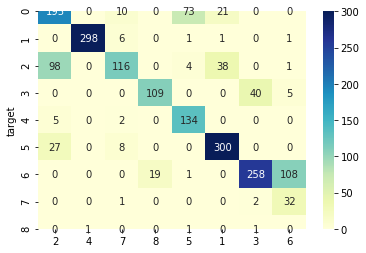

In [21]:
df_r = reorder_seurat(df_r)
sns.heatmap(df_r, cmap="YlGnBu", annot=True, fmt="d")

In [22]:
df_sc3 = pd.crosstab(sc3_r['target'], sc3_r['sc3_10_clusters'])
df_sc3_s = df_sc3.copy()
df_sc3_s["sum"] = df_sc3_s.sum(axis=1)
df_sc3_s

sc3_10_clusters,1,2,3,4,5,6,7,8,9,10,sum
target,,,,,,,,,,,
0,158,0,0,10,14,49,74,0,0,3,308
1,0,223,17,0,19,1,44,3,0,0,307
2,0,3,1,0,83,153,267,0,0,0,507
3,1,0,1,0,0,2,8,10,130,2,154
4,122,0,0,2,0,2,0,0,0,15,141
5,0,0,0,0,131,152,258,1,0,0,542
6,1,2,0,0,2,1,27,223,41,89,386
7,0,5,8,0,0,0,2,18,0,2,35
8,0,0,0,0,0,0,2,1,0,0,3


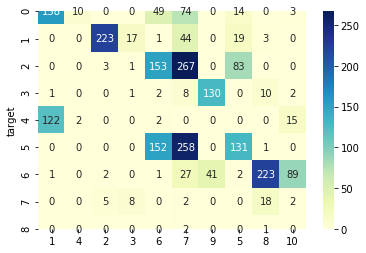

In [23]:
df_sc3 = reorder(df_sc3)
sns.heatmap(df_sc3, cmap="YlGnBu", annot=True, fmt="d")

In [24]:
df_cooc = pd.crosstab(cooc_data['target'], cooc_data[cooc_data['cooc_clusters']<20]['cooc_clusters'])
df_cooc_s = df_cooc.copy()
df_cooc_s["sum"] = df_cooc.sum(axis=1)
df_cooc_s

cooc_clusters,1,2,sum
target,,,
0,1,347,348
1,8,336,344
2,4,504,508
3,158,10,168
4,0,144,144
5,0,589,589
6,371,92,463
7,1,13,14
8,33,3,36


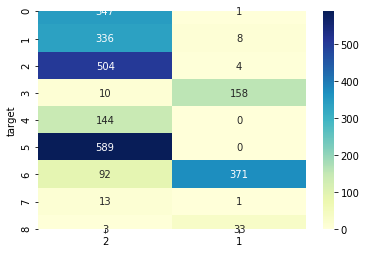

In [25]:
df_cooc = reorder(df_cooc)
sns.heatmap(df_cooc, cmap="YlGnBu", annot=True, fmt="d")

In [26]:
df_race = pd.crosstab(race_data['target'], race_data[race_data['V1']<13]['V1'])
df_race_s = df_race.copy()
df_race_s["sum"] = df_race.sum(axis=1)
df_race_s

V1,1,2,3,4,5,6,7,8,9,10,11,12,sum
target,,,,,,,,,,,,,
0,24,35,8,4,62,46,18,94,0,7,1,0,299
1,19,26,10,0,88,63,46,0,37,11,0,0,300
2,49,46,9,0,280,81,22,0,0,15,1,0,503
3,5,0,88,0,9,9,36,0,0,2,1,0,150
4,1,0,0,88,1,2,1,47,0,0,0,1,141
5,76,46,1,0,305,70,22,0,0,20,0,0,540
6,17,3,68,0,49,47,189,0,0,0,2,2,377
7,1,0,1,0,10,7,16,0,0,0,0,0,35
8,0,0,0,0,1,1,0,0,0,0,0,0,2


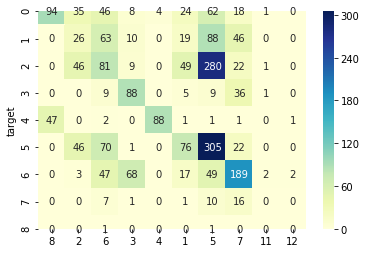

In [27]:
df_race = reorder(df_race)
df_race = df_race.drop(columns = [9,10])
sns.heatmap(df_race, cmap="YlGnBu", annot=True, fmt="d")

# Calculating the metrics

In [28]:
def calc_h_accuracy(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=0)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df.columns)

def calc_h_purity(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=1)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df)

In [29]:
print("======pbmc3k results======")
print("The entropy of cluster accuracy for seurat R: {:.5f}".format(calc_h_accuracy(df_r)))
print("The entropy of cluster accuracy for sc3: {:.5f}".format(calc_h_accuracy(df_sc3)))
print("The entropy of cluster accuracy for cooc: {:.5f}".format(calc_h_accuracy(df_cooc)))
print("The entropy of cluster accuracy for RaceID3: {:.5f}".format(calc_h_accuracy(df_race)))

======pbmc3k results======
The entropy of cluster accuracy for seurat R: 0.84713
The entropy of cluster accuracy for sc3: 1.09894
The entropy of cluster accuracy for cooc: 1.88581
The entropy of cluster accuracy for RaceID3: 1.69279


In [30]:
print("======pbmc3k results======")
print("The entropy of cluster purity for seurat R: {:.5f}".format(calc_h_purity(df_r)))
print("The entropy of cluster purity for sc3: {:.5f}".format(calc_h_purity(df_sc3)))
print("The entropy of cluster purity for cooc: {:.5f}".format(calc_h_purity(df_cooc)))
print("The entropy of cluster purity for RaceID3: {:.5f}".format(calc_h_purity(df_race)))

======pbmc3k results======
The entropy of cluster purity for seurat R: 0.91956
The entropy of cluster purity for sc3: 1.36289
The entropy of cluster purity for cooc: 0.23130
The entropy of cluster purity for RaceID3: 1.80185


In [31]:
from sklearn.metrics.cluster import adjusted_rand_score
print("======pbmc3k cell lines results======")
print("The ARI for seurat R (resolution=1): {:.5f}".format(adjusted_rand_score(newdata['target'], newdata['seurat_clusters_y'])))
print("The ARI for sc3: {:.5f}".format(adjusted_rand_score(sc3_r['target'], sc3_r['sc3_10_clusters'])))
print("The ARI for cooc: {:.5f}".format(adjusted_rand_score(cooc_data['target'], cooc_data['cooc_clusters'])))
print("The ARI for RaceID3: {:.5f}".format(adjusted_rand_score(race_data['target'], race_data['V1'])))

======pbmc3k cell lines results======
The ARI for seurat R (resolution=1): 0.47975
The ARI for sc3: 0.30933
The ARI for cooc: 0.14438
The ARI for RaceID3: 0.16011
